In [10]:
import numpy as np
import pandas as pd
import pymongo
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
img_dir = 'C:/Users/yhn03/MulticampusProject/3rd/image5'

In [3]:
user = 'team04'
pw = '1111'
host = 'ec2-54-95-8-243.ap-northeast-1.compute.amazonaws.com'
client = pymongo.MongoClient(f'mongodb://{user}:{pw}@{host}:27017/')
db = client.resell

In [4]:
df_model_no = pd.DataFrame(db.kream_detail.find({}, {'_id': 0, 'model_no': 1}))
df_model_no['model_no'] = df_model_no['model_no'].apply(lambda x: x.strip())
df_model_no = df_model_no.sort_values('model_no').reset_index(drop=True)
df_model_no

,model_no
0,130207-061
1,130207-101
2,130245-062
3,136002-061
4,136002-132
...,...
2988,DV3528-102
2989,DV3529-102
2990,DV3605-410
2991,DX4446-301


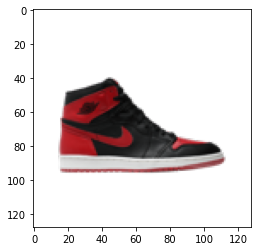

           R    G    B
cluster               
-1       131   71   75
 0        32   33   33
 1       154   26   31
 2       212  213  212
 3       154   45   51
0.6503570366168748


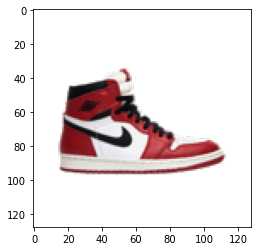

           R    G    B
cluster               
-1       135   96   97
 0       230  230  228
 1       138   31   37
 2        23   23   25
 3       195   77   83
0.7348795932962809


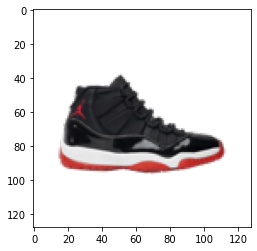

           R    G    B
cluster               
-1       157  100  101
 0        37   37   41
 1        89   88   90
 2       232  232  233
 3       203   58   51
 4       186   57   54
0.6422417143073964


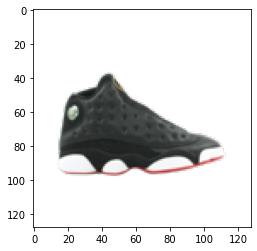

           R    G    B
cluster               
-1       168  140  137
 0         2    2    2
 1        57   61   60
 2       247  248  248
0.6452376099376822


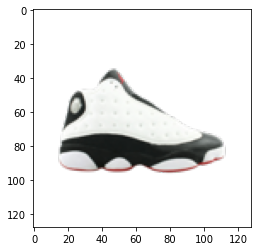

           R    G    B
cluster               
-1       153  124  121
 0       121  127  124
 1        41   45   42
 2       239  241  238
0.7907873824597329


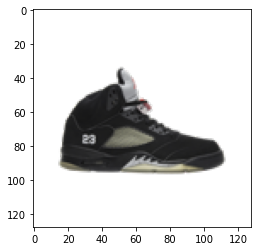

           R    G    B
cluster               
-1       154  148  139
 0        41   41   42
 1       177  179  181
 2       119  118  102
 3       153  155  158
0.7150649430475161


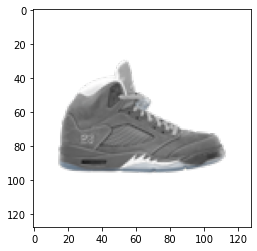

           R    G    B
cluster               
-1       110  117  124
 0       241  241  242
 1       119  119  119
 2       202  205  208
 3       113  128  143
0.02286956526684058


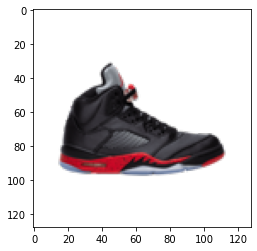

           R    G    B
cluster               
-1       143   85   99
 0        47   45   50
 1       125  128  134
 2       193   14   39
 3       196  201  214
0.6332967012118997


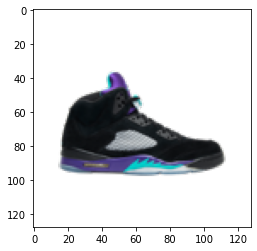

           R    G    B
cluster               
-1       113  130  153
 0        28   31   33
 1        96   98   99
 2       166  173  177
 3       145  152  157
 4        78   64  135
 5         1  207  202
 6        92  120  141
0.6502421561089772


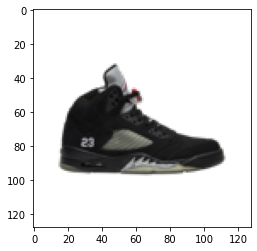

           R    G    B
cluster               
-1       137  131  125
 0        41   41   40
 1       160  162  165
 2       141  142  129
0.6809351543817312


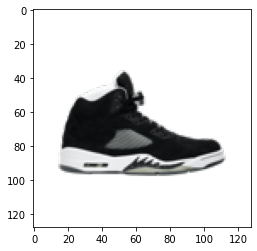

           R    G    B
cluster               
-1       165  167  162
 0       234  236  237
 1        39   40   41
0.8212785418955854


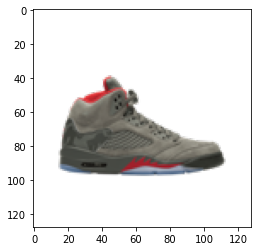

           R    G    B
cluster               
-1       139  107  115
 0       100   99   91
 1       162   30   42
 2        79  104  135
0.19913550650396233


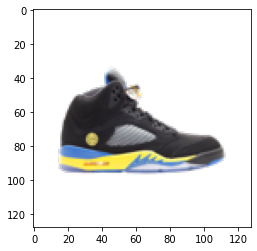

           R    G    B
cluster               
-1       155  161  157
 0        62   60   63
 1       145  147  154
 2        84  133  207
 3       255  237   79
 4       224  225  236
0.6059240630437303


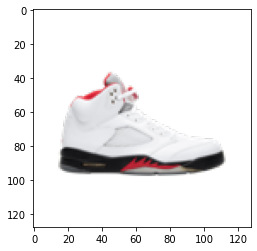

           R    G    B
cluster               
-1       157  117  118
 0       228  230  233
 1        68   69   71
 2        29   29   30
 3       187   37   52
0.8763981668228936


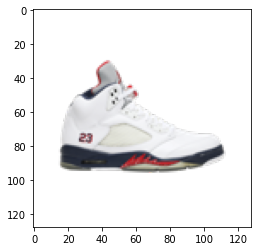

           R    G    B
cluster               
-1       135  106  107
 0       228  229  230
 1       171  173  176
 2        42   47   60
 3        85   86   81
0.6850637113808792


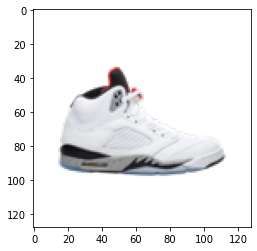

           R    G    B
cluster               
-1       122  114  122
 0        37   36   39
 1       224  226  231
 2        81   81   82
 3       143  144  146
 4       172  174  178
 5        81  105  134
0.6641255486804065


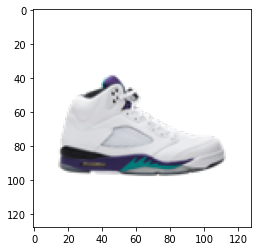

           R    G    B
cluster               
-1        88   98  113
 0        49   41   79
 1       212  213  216
 2        56   57   63
 3        39   39   42
 4        28   28   31
 5        72   76   83
 6         1  122  122
0.8087829716342723


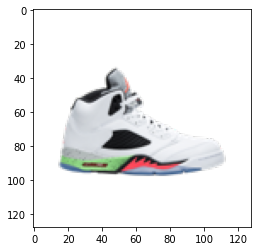

           R    G    B
cluster               
-1       130  126  121
 0       216  220  224
 1        28   29   31
 2       132  199  123
 3        67  101  145
 4        60   90  130
0.7040796815716386


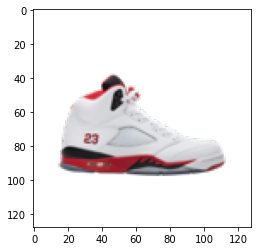

           R    G    B
cluster               
-1       147   98  103
 0        61   65   74
 1        52   53   58
 2        34   33   35
 3       214  215  218
 4       146   29   41
 5       174   30   47
 6       166  168  172
0.6424543570984163


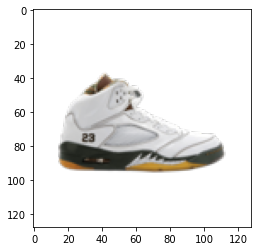

           R    G    B
cluster               
-1       128  108   80
 0       205  205  206
 1        46   49   42
 2        86   90   85
 3       195  147   50
0.6996998671698499


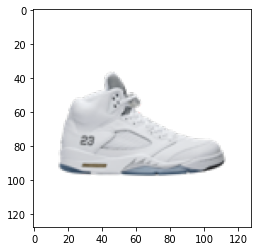

           R    G    B
cluster               
-1       102  109  117
 0       205  207  211
 1       140  144  148
 2       127  130  133
 3        59   80  102
 4       141  156  172
0.5888440473446187


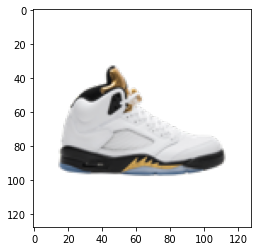

           R    G    B
cluster               
-1       135  128  115
 0        37   37   38
 1       213  214  216
 2        70   93  122
0.846174067847795


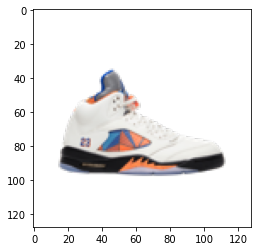

           R    G    B
cluster               
-1       144  124  128
 0       129  129  133
 1       231  230  226
 2        29   29   31
0.8922147317917457


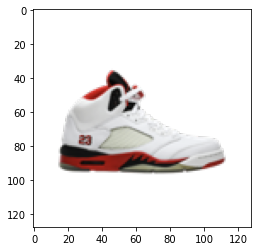

           R    G    B
cluster               
-1       131   95   88
 0        19   20   20
 1       139   30   23
 2       214  215  215
 3        61   61   52
 4        52   50   44
0.8404064810914357


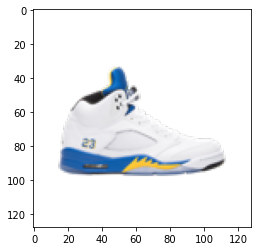

           R    G    B
cluster               
-1       114  129  144
 0        28   95  167
 1       232  232  236
 2        40   37   39
 3       255  202   52
 4        87  106  144
 5       188  192  209
0.7076843629192177


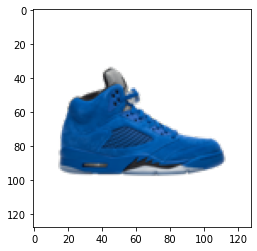

           R    G    B
cluster               
-1        87  113  142
 0        39   38   40
 1         5   77  146
 2        98  121  147
 3       197  204  211
 4        87  108  134
0.6784920286655924


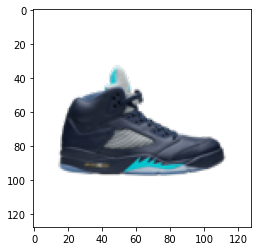

           R    G    B
cluster               
-1       113  146  158
 0        49   56   72
 1       130  137  141
 2        70   93  123
 3       110  115  121
 4         1  198  208
0.2984062218160395


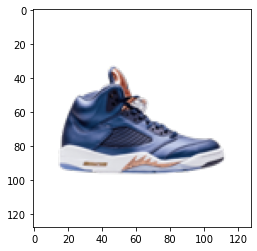

           R    G    B
cluster               
-1       131  124  139
 0        61   78  117
 1       224  225  230
 2       181  188  209
 3       168  175  200
 4       204  203  212
 5        74   83  118
-0.05173754494756688


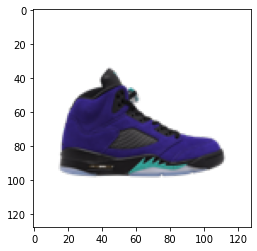

           R    G    B
cluster               
-1        88  104  126
 0        42   41   43
 1        46   33  106
 2        52  152  144
 3       172  174  188
0.604105195424959


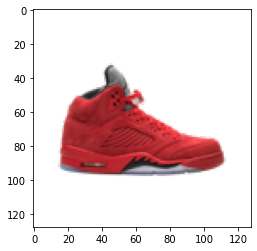

           R   G    B
cluster              
-1       151  98  102
 0        42  40   42
 1        32  31   32
 2       168  41   47
0.7324888655619295


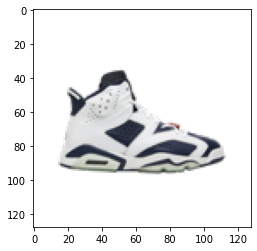

           R    G    B
cluster               
-1       118  120  117
 0        44   49   63
 1       219  221  220
 2        75   80   92
 3        86   90   98
 4       166  168  169
 5       153  156  159
0.6151500159241053


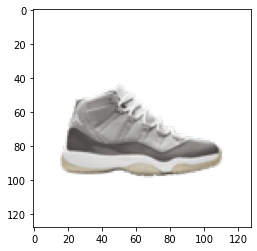

           R    G    B
cluster               
-1       139  131  115
 0       162  160  158
 1       189  179  158
 2       160  150  131
-0.3575275071765326


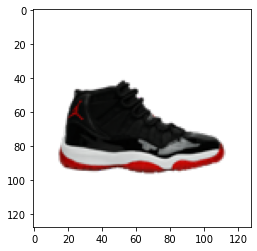

           R    G    B
cluster               
-1       135   62   61
 0        16   17   16
 1        74   76   75
 2       125  128  128
 3       209  212  212
 4       137   20   16
 5       167   16   14
0.7780518955706964


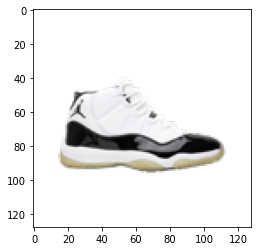

           R    G    B
cluster               
-1       155  149  133
 0       238  237  240
 1        29   28   29
 2       118  118  121
 3       164  152  116
 4       192  179  136
0.7776850318910771


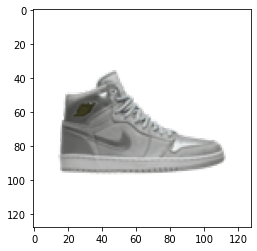

           R    G    B
cluster               
-1       161  163  157
 0       145  146  145
 1        51   50   29
0.5526427490995439


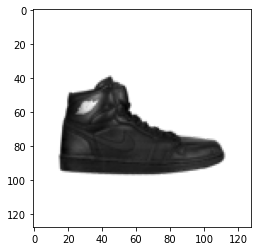

           R    G    B
cluster               
-1       149  149  149
 0        41   41   41
 1       101  101  101
0.6986972543286025


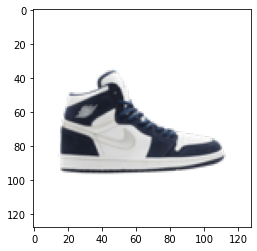

           R    G    B
cluster               
-1       102  111  125
 0       216  216  215
 1        41   45   59
 2       172  173  177
 3       148  150  155
 4       129  132  138
0.6571035425759701


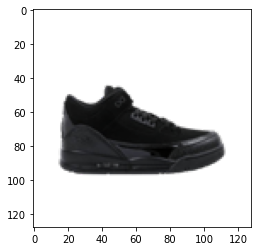

           R    G    B
cluster               
-1       123  123  129
 0        34   35   36


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [19]:
for model_no in df_model_no['model_no'][:200]:
    model_no = model_no.replace('/', ' ')
    file = f'{img_dir}/{model_no}.png'
    img = Image.open(file)
    img = img.resize((128, 128))

    img_arr = np.array(img)
    img_arr = np.reshape(img_arr, (-1, 4))

    img_df = pd.DataFrame(img_arr, columns=['R', 'G', 'B', 'alpha'])
    img_df = img_df.drop('alpha', axis=1)
    img_df = img_df[~((img_df['R'] == 0) & (img_df['G'] == 0) & (img_df['B'] == 0))]

    plt.imshow(img)
    plt.show()

    model = DBSCAN(eps=6, min_samples=25)
    model.fit_predict(img_df)
    img_df['cluster'] = model.labels_
    print(img_df.groupby('cluster').mean().apply(round).astype(np.int64))
    print(silhouette_score(img_df.loc[img_df['cluster'] != -1, ['R', 'G', 'B']], img_df.loc[img_df['cluster'] != -1, 'cluster']))

In [ ]:
silhouette_score()

In [68]:
conn = f"mysql://{user}:{pw}@{host}/resell?charset=utf8"
engine = create_engine(conn, encoding='utf-8')

In [71]:
color_cluster_df = pd.DataFrame()

for model_no in df_model_no['model_no']:
    img_name = model_no.replace('/', ' ')
    file = f'{img_dir}/{img_name}.png'
    img = Image.open(file)
    img = img.resize((128, 128))

    img_arr = np.array(img)
    img_arr = np.reshape(img_arr, (-1, 4))

    img_df = pd.DataFrame(img_arr, columns=['R', 'G', 'B', 'alpha'])
    img_df = img_df.drop('alpha', axis=1)
    img_df = img_df[~((img_df['R'] == 0) & (img_df['G'] == 0) & (img_df['B'] == 0))]
    
    # Clustering
    model = DBSCAN(eps=6, min_samples=25)
    model.fit_predict(img_df)
    img_df['cluster'] = model.labels_
    
    img_df = img_df[img_df['cluster'] != -1]
    cluster_df = img_df.groupby('cluster').mean().apply(round).astype(np.uint8)
    cluster_df.columns = ['cluster_R', 'cluster_G', 'cluster_B']
    
    img_df = img_df.merge(cluster_df, left_on='cluster', right_index=True, how='left')
    img_df = img_df.astype(np.uint8)
    
    img_df['model_no'] = model_no
    
    # Save result
    img_df[['model_no', 'R', 'G', 'B', 'cluster_R', 'cluster_G', 'cluster_B']].to_sql(
        'model_rgb',
        con=engine,
        if_exists='append',
        index=False,
        dtype={
            'model_no': sqlalchemy.types.String(40),
            'R': sqlalchemy.types.Integer(),
            'G': sqlalchemy.types.Integer(),
            'B': sqlalchemy.types.Integer(),
            'cluster_R': sqlalchemy.types.Integer(),
            'cluster_G': sqlalchemy.types.Integer(),
            'cluster_B': sqlalchemy.types.Integer()
        }
    )
    
    color_cluster_df = pd.concat((color_cluster_df, cluster_df), axis=0)

In [72]:
color_cluster_df.to_csv('cluster_color.csv', index=False)

In [73]:
color_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10827 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cluster_R  10827 non-null  uint8
 1   cluster_G  10827 non-null  uint8
 2   cluster_B  10827 non-null  uint8
dtypes: uint8(3)
memory usage: 116.3 KB
